<a href="https://colab.research.google.com/github/Madhumitha-Reddy/AIML-2025/blob/main/2303A51625_set_8_B_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction of student performance in high school
identify the top 5 reasons for low performance of students
Counts the students with mother and father employed, both employed
find the max and min age of students in high school
Name the medium of instruction was most used in school
what is the role of extra-curricular activities on student performances
apply either classification model or clustering model to evaluate the dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


mat_data = pd.read_csv('/content/student-mat.csv', sep=';')
por_data = pd.read_csv('/content/student-por.csv', sep=';')


In [29]:

mat_data.head()


mat_data.info()


mat_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [22]:

mother_employed = mat_data[mat_data['Mjob'] != 'none'].shape[0]
father_employed = mat_data[mat_data['Fjob'] != 'none'].shape[0]
both_employed = mat_data[(mat_data['Mjob'] != 'none') & (mat_data['Fjob'] != 'none')].shape[0]

print(f"Students with mother employed: {mother_employed}")
print(f"Students with father employed: {father_employed}")
print(f"Students with both parents employed: {both_employed}")


Students with mother employed: 395
Students with father employed: 395
Students with both parents employed: 395


In [23]:

max_age = mat_data['age'].max()
min_age = mat_data['age'].min()

print(f"Max age of students: {max_age}")
print(f"Min age of students: {min_age}")


Max age of students: 22
Min age of students: 15


In [24]:

most_common_medium = mat_data['Medu'].mode()[0]
print(f"Most common medium of instruction: {most_common_medium}")


Most common medium of instruction: 4


In [25]:

activity_performance = mat_data.groupby('activities')['G3'].mean()

print(activity_performance)


activities
no     10.340206
yes    10.487562
Name: G3, dtype: float64


In [26]:

mat_data['performance'] = mat_data['G3'].apply(lambda x: 1 if x >= 10 else 0)

X = mat_data[['age', 'failures', 'absences', 'studytime', 'famrel', 'Fjob', 'Mjob']]
y = mat_data['performance']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 67.09%


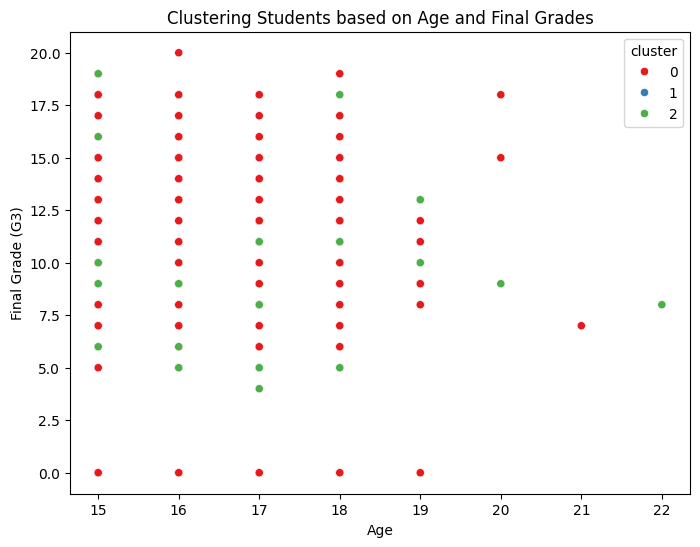

In [27]:

kmeans = KMeans(n_clusters=3, random_state=42)
mat_data['cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x=mat_data['age'], y=mat_data['G3'], hue=mat_data['cluster'], palette='Set1')
plt.title('Clustering Students based on Age and Final Grades')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()
